In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

plt.style.use("ggplot")

## Problem Set 2 (Revised) - Quant Macro

### Weimin Zhou

### Due: 4, Oct, 2018

----
### Revised Part:

After discussing during class, I'm going to calculate the Labor Share as following:

- The baseline is the share of labor compensation of employees, and it does not include self-employed income.
- Adjustment 1 adds all of mixed-income1 to total labor compensation.
- Adjustment 2 adds mixed-income to total labor compensation in the same proportion as the rest of the economy. (Although adjustment 2 is considered the best measure, only Japan reports mixed-income.)

By NBER working paper [CAPITAL DEPRECIATION AND LABOR SHARES AROUND THE WORLD: MEASUREMENT AND IMPLICATIONS. Loukas Karabarbounis, 2014.](https://www.nber.org/papers/w20606). My total depreciation will be Gross Domestic Product (GDP) minus Net Domestic Product (NDP) (For US data, go to NIPA BEA Table1.17.5). And the four labor share measures are: 

1. Total Net Labor Share: 

$$ TotalNet\_LS = \frac{(Total) Compensation of Employees}{Gross Domestic Product - Total Depreciation}$$

where as a comparison, I calculate Net Labor Share by using National Income: 
$$ Net\_LS = \frac{Compensation of Employees}{National Income} $$

2. Total Gross Labor Share: 

$$ TotalGross\_LS = \frac{Total Compensation of Employees}{Gross Domestic Product}$$

3. Corporate Sector Gross Labor Share: 

$$ CorporateGross\_LS = \frac{Corporate Compensation of Employees}{Corporate Gross Value Added}$$


4. Corporate Net Labor Share:

$$ CorporateNet\_LS = \frac{Corporate Compensation of Employees}{Corporate Gross Value Added − Corporate Depreciation}$$

----
#### Questions: 
### 1. Construct the accounting LS for the corporate sector for the United States (1947-2017).

### 2. Redo the two previous items for your country of origin. If data are missing for your country, then do it for Japan and the UK.

Describe in detail what you do to construct each of your accounting LS and discuss your findings. What are the secular properties of the LS that you find in each of the items above?

In [1]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/zhouweimin/PycharmProjects/QuantEcon


In [11]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
US_data = pd.read_excel('US.xls',sep = ',',index_col=0)
US_data = US_data.transpose()
US_data.columns

Index(['        National income', 'Compensation of employees',
       '    Wages and salaries', '        Government', '        Other',
       '    Supplements to wages and salaries',
       '        Employer contributions for employee pension and insurance funds1',
       '        Employer contributions for government social insurance',
       'Proprietors' income with IVA and CCAdj', '    Farm', '    Nonfarm',
       'Rental income of persons with CCAdj',
       'Corporate profits with IVA and CCAdj', '    Taxes on corporate income',
       '    Profits after tax with IVA and CCAdj', '        Net dividends',
       '        Undistributed profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports', 'Less: Subsidies2',
       'Business current transfer payments (net)', '    To persons (net)',
       '    To government (net)', '    To the rest of the world (net)',
       'Current surplus of government enterprises2',
       'Adde

## 1. Construct the nationwide accounting LS for the United States (1947-2017)

## Labor Share - Straight Simple Version

By downloading Table 1.12: National Income by Type of Income from year 1947 to 2017. And for a more fast speed data manipulation, I use MS Excel to delete columns and rows I don't need, if for purely manipulating in Python, just use pandas packages with options 'skiprows' and 'skipcols' in command [read_excel]

I first distinguish which is sourcing from labor and capital, specifically: wage times effective working hours are the labor part, indexed as $w*H$ and rental rates times capital stock are the capital part of contribution, indexed as $r*K$. 

"Depending on the choice of numerator and denominator, one can end up
with a variety of “shares” that need not tell the same story." 

By "What Do We Know About the Labor Share and the Profit Share?". Oliver Giovannoni(2014), page 8. 

Thus this simple version of labor shares is described following:

As discussed during class, there's one sector named 'Proprietors' income with IVA and CCAdj' (PI hereafter) is regarded as self-employed sector, which needs split labor and capital.

*Nationwide Labor Share*: I call such labor share as Nationwide Labor share consists of wages, benefits and an estimate of the labor component of proprietors’ income. Since this measure contains also sel-employeed sector, farm and nonbusinees sectors.

*Naive Labor Share*: Labor share for the corporate sector, which indicates there's no accounting for farm and nonbusiness sector. 

The general formula of computing labor share is defined by: 

$$ \alpha^{j}_{i,t} = \frac{W_t}{Y_t}$$

where $j$ is the type of labor share (nationwide or naive); $i$ indicates the country (US or UK); $W_t$ is the sum of labor income at time t; ${Y_t}$ is the measure of total income. 


For Total Income $Y_t$, sum up all of which:

### Labor: 
- 'Compensation of employees' 

### Need to separate: 
- 'Proprietors' income with IVA and CCAdj'

To separate PI, we use the following strategy:

1. compute $\frac{wH}{Y-PI}=\theta$ where $\theta$ is the wage of PI

2. then: $(rK)_{PI} = (1-\theta)PI$ as capital part, and $(wH)_{PI}=\theta PI$

To exclude PI, compute Naive Labor Share by:
$$ \frac{CE}{Y}$$

### Capital: 
- 'Rental income of persons with CCAdj'

- 'Corporate profits with IVA and CCAdj'

- 'Net interest and miscellaneous payments'

#### Taxes need to adjust: 

- 'Taxes on production and imports'

- 'Less:Subsidies2'


In [12]:
CE   = US_data[['Compensation of employees']] 
PI   = US_data[['Proprietors\' income with IVA and CCAdj']]
RI   = US_data[['Rental income of persons with CCAdj']]
CP   = US_data[['Corporate profits with IVA and CCAdj']]
NIMP = US_data[['Net interest and miscellaneous payments']]
Taxes  = US_data[['Taxes on production and imports']]
Lsubsidies = US_data[['Less: Subsidies2']]
NI = US_data[['        National income']]

CE = np.asarray(CE, float)
PI = np.asarray(PI, float)
RI = np.asarray(RI, float)
CP = np.asarray(CP, float)
NIMP = np.asarray(NIMP, float)
Taxes = np.asarray(Taxes, float)
Lsubsidies = np.asarray(Lsubsidies, float)
NI = np.asarray(NI, float)

In [16]:
'''
Depreciation obtained by comsuption of fixed capital from Table 1.14 of NIPA BEA

Using corporate sector 
'''

frame1 = pd.read_excel('depreciation.xls',sep = ',',index_col=0, sheetname='Sheet2')

frame1 = frame1.transpose()
frame1.columns

delta = frame1[['Consumption of fixed capital']]

len(delta)

71

The following analysis should be addressed to Gross Labor Share, with 3 different measurements, baseline, adjustment 1 and 2 respectively. 

We can see a slightly decreasing, as discussed during class, which may be interpreted as Income Inequality or Technological Progressivity, or faster Growing of Capital Income. 

## Extended: Tax-Adjusted Labor Share

### Above is a gross aggregate approach to calculte the labor share. Hereafter, I propose a more completed way to compute based on our dataset. 

By the hint from "Capital Depreciation and Labor Shares Around the World: Measurement and Implications". Loukas and Brent (2014). Above practice effectively treats all taxes as capital income. Thus, A reasonable alternative treatment is to make a tax-adjusted labor share, defined by:

$$ \tilde s^{j}_{L,i,t}=\frac{Compensation + \tilde s^{j}_{L,i,t} \times Taxes \quad on\quad Production}{Value\quad Added}$$

$$ \tilde s^{j}_{L,i,t}=s^{j}_{L,i,t} \frac{1}{1-\tau^{j}_{i,t}}$$

*Labor Part*: 
- Compensation of employees

*Mixed Part*: 

- Proprietor's income with IVA and CCAdj
- 

*Capital Part*:
- Rental income of persons with CCAdj
- Corporate profits with IVA and CCAdj
- Net interest and miscellaneous payments

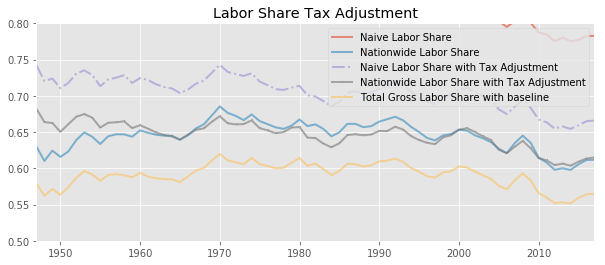

In [19]:
# Labor share with tax adjustment
tau = (Taxes+Lsubsidies)/Y1

LS_tau = LS_naive * (1/(1-tau)) 
LS_tau1 = LS_naive1 * (1/(1-tau)) 
LS_tau2 = LS_national1 * (1/(1-tau)) 

Year = np.linspace(1947,2017,num=71)
Year = np.asarray(Year)

fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.5,1)
plt.xlim(1947,2017)
ax.plot(Year, LS_tau, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_tau1, linewidth=2, alpha=0.6, label='Nationwide Labor Share')
ax.plot(Year, LS_tau2, '-.', linewidth=2, alpha=0.6, label='Naive Labor Share with Tax Adjustment')
ax.plot(Year, LS_national1, '-,', linewidth=2, alpha=0.6, label='Nationwide Labor Share with Tax Adjustment')

ax.plot(Year, LS_naive1, linewidth=2, alpha=0.6, label='Total Gross Labor Share with baseline')

plt.title('Labor Share with Tax Adjustment')
ax.legend()
plt.show()

## 2. Construct the accounting LS for the corporate sector for the United States (1947-2017).

From [Table 1.13. National Income by Sector, Legal Form of Organization, and Type of Income](https://apps.bea.gov/iTable/iTable.cfm?reqid=19&step=2#reqid=19&step=2&isuri=1&1921=survey)

In [2]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
US_data0 = pd.read_excel('US2.xls',sep = ',',index_col=0, sheetname='Sheet1')
US_data0.index

Index(['Corporate business', 'Compensation of employees', 'Wages and salaries',
       'Supplements to wages and salaries',
       'Corporate profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports less subsidies plus business current transfer payments'],
      dtype='object')

In [3]:
US_data0 = US_data0.transpose()
US_data0.columns

Index(['Corporate business', 'Compensation of employees', 'Wages and salaries',
       'Supplements to wages and salaries',
       'Corporate profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports less subsidies plus business current transfer payments'],
      dtype='object')


# Aggregate Naive Labor Share without Tax Adjustment:
Y1 = CE + PI + RI + CP + NIMP + Taxes + Lsubsidies + delta

# All capital income including depreciation
CI = RI + CP + NIMP + delta

LS_naive = 1 - CI/ Y1 # Gross total labor share 

LS_naive1 = CE / Y1  

# == Net Labor Share  == #
Net_LS = CE / NI 
# Aggregate Nationwide Labor Share
theta = CE / (Y1 - PI)
RK_PI = (1-theta)*PI
LS_national1 = ( CE + theta*PI ) / Y1

Year = np.linspace(1947,2017,num=71)
Year = np.asarray(Year)

fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.5,0.8)
plt.xlim(1947,2017)
ax.plot(Year, LS_naive1, linewidth=2, alpha=0.6, label='Total Gross Labor Share with baseline')
ax.plot(Year, LS_national1, linewidth=2, alpha=0.6, label='Total Gross Labor Share with adjustment 2')
ax.plot(Year, LS_naive, linewidth=2, alpha=0.6, label='Total Gross Labor Share with adjustment 1')
plt.title('Gross Labor Share considering depreciation')
ax.legend()
plt.show()



In [6]:
Y0   = US_data0[['Corporate business']] 
CE0   =e US_data0[['Compensation of employees']] 
Taxes0  = US_data0[['Taxes on production and imports less subsidies plus business current transfer payments']]


CE0 = np.asarray(CE0, float)
Y0 = np.asarray(Y0, float)
Taxes0 = np.asarray(Taxes0, float)

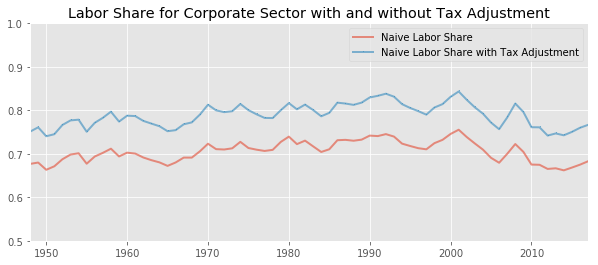

In [8]:
# Naive Labor Share:
LS_naive0 = CE0 / Y0
# Labor share with tax adjustment
tau0 = (Taxes0)/Y0
LS_naive00 = LS_naive0 * (1/(1-tau0)) 

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)

fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.5,1)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive0, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_naive00, '-,', linewidth=2, alpha=0.6, label='Naive Labor Share with Tax Adjustment')
plt.title('Labor Share for Corporate Sector with and without Tax Adjustment')
ax.legend()
plt.show()

### Part 2. Redo with UK data

Since Chinese Data on National Income is only provincial available, which is more time-consuming to collect.

I use United Kindom Data, sourced from [Office for National Statistics (GB)](https://www.ons.gov.uk/economy/nationalaccounts/uksectoraccounts/datasets/unitedkingdomeconomicaccountsmainaggregates) instead.

Database: UK Economic Accounts: main aggregates - Table 1.6.3: Income and Capital accounts United Kingdom, ESA2010 Sector S.1 (pounds million)


In [14]:
UK_data = pd.read_excel('UK.xls',sep = ',',index_col=0,sheetname='Sheet1')
# UK_data = UK_data.transpose()
UK_data.columns

Int64Index([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
            1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
            1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64')

In [15]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
UK_data = pd.read_excel('UK.xls',sep = ',',index_col=0,sheetname='Sheet1')
UK_data.index

Index(['Compensation of employees', 'Gross operating surplus of corporations',
       'Other income', 'Gross value added at factor cost',
       'Taxes on production less subsidies',
       'Statistical discrepancy (income)',
       'Gross domestic product at market prices'],
      dtype='object')

In [16]:
UK_data = UK_data.transpose()
CE = UK_data[['Compensation of employees']]
GOSC = UK_data[['Gross operating surplus of corporations']]
OI = UK_data[['Other income']]
GVA = UK_data[['Gross value added at factor cost']]
TPL = UK_data[['Taxes on production less subsidies']]

CE = np.asarray(CE, float)
GOSC = np.asarray(GOSC, float)
OI = np.asarray(OI, float)
GVA = np.asarray(GVA, float)
TPL = np.asarray(TPL, float)

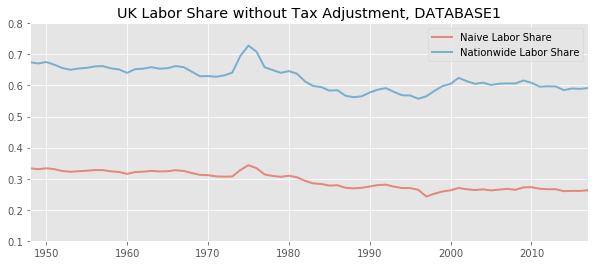

In [18]:
# Naive Labor Share:
OI = np.nan_to_num(OI)
PI = OI + GVA
Y = CE + GOSC + PI + TPL
LS_naive = CE / Y  # LS for the corporate sector

# Nationwide Labor Share
theta = CE / (Y - PI)
RK_PI = (1-theta)*PI
LS_national = ( CE + theta*PI ) / Y

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.1,0.8)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_national, linewidth=2, alpha=0.6, label='Nationwide Labor Share')
plt.title('UK Labor Share without Tax Adjustment, DATABASE1')
ax.legend()
plt.show()

In [24]:
UK_data2 = pd.read_excel('UK1.xls',sep = ',',index_col=0,sheetname='Sheet1')
UK_data2 = UK_data2.transpose()
UK_data2.columns

Index(['Gross operating surplus', 'Gross mixed income',
       'Compensation of employees', 'Taxes on products',
       'Subsidies on products', 'Other subsidies on production',
       'Property income', 'Gross domestic product'],
      dtype='object')

In [25]:
CE2 = UK_data2[['Compensation of employees']]
GOS2 = UK_data2[['Gross operating surplus']]
GMI2 = UK_data2[['Gross mixed income']]
SOP2 = UK_data2[['Subsidies on products']]
TOP2 = UK_data2[['Taxes on products']]
OSOP2 = UK_data2[['Other subsidies on production']]
PI2 = UK_data2[['Property income']]
GDP = UK_data2[['Gross domestic product']]

CE2 = np.asarray(CE2, float)
GOS2 = np.asarray(GOS2, float)
GMI2 = np.asarray(GMI2, float)
SOP2 = np.asarray(SOP2, float)
TOP2 = np.asarray(TOP2, float)
OSOP2 = np.asarray(OSOP2, float)
PI2 = np.asarray(PI2, float)
GDP = np.asarray(GDP,float)

In [26]:
TOP2 = np.nan_to_num(TOP2)
OSOP2 = np.nan_to_num(OSOP2)
PI2 = np.nan_to_num(PI2)
SOP2 = np.nan_to_num(SOP2)
# Naive Labor Share:
PI = GMI2
tau = TOP2 + OSOP2 + SOP2

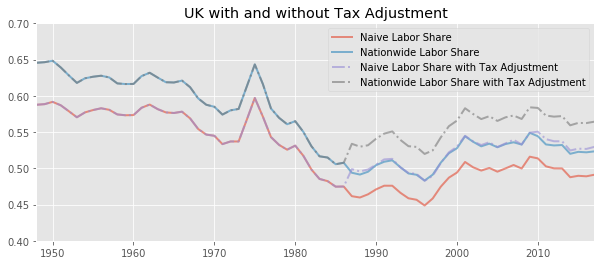

In [32]:
# use GDP but not sum-up, to avoid statistics discrepancy
LS_naive3 = CE2 / GDP

# Nationwide Labor Share
theta1 = CE2 / (GDP - PI)
RK_PI = (1-theta1)*PI
LS_national3 = ( CE2 + theta1*PI ) / GDP

# Tax Adjustment:
tau0 = (TOP2+OSOP2+SOP2)/GDP

LS_naive4 = LS_naive3*(1/(1-tau0))
LS_national4 = LS_national3*(1/(1-tau0)) 

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.4,0.7)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive3, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_national3, linewidth=2, alpha=0.6, label='Nationwide Labor Share')
ax.plot(Year, LS_naive4, '-.', linewidth=2, alpha=0.6, label='Naive Labor Share with Tax Adjustment')
ax.plot(Year, LS_national4, '-.', linewidth=2, alpha=0.6, label='Nationwide Labor Share with Tax Adjustment')
plt.title('UK with and without Tax Adjustment')
ax.legend()
plt.show()

## Comments:

By looking at the UK data, there's no data for taxes, subsidies and property income from 1948 to 1987. (also checked [OECD stats](https://stats.oecd.org/Index.aspx?DatasetCode=IDD#)) Hence, for tax adjustment, labor shares remain the same before 1987. 

Comparing US and UK data, both Labor shares show a decline in the past 30 years, which corresponds to analysis in many papers. The interpretation about such a decline is linked to globalisation and technological progress, i.e. “robotisation”.[A detail blog about declining LS](http://bruegel.org/2017/04/the-decline-of-the-labour-share-of-income/)

And in practice not all types of income can easily be ascribed to either capital or labor, different measure of data, different denominator and nominator lead to a different labor share. 

In [34]:
JAPAN_data = pd.read_excel('JAPAN.xlsx',sep = ',',index_col=0)
JAPAN_data = JAPAN_data.transpose()
JAPAN_data.columns

Index([                                             nan,
                                                  'GDP',
                            'Compensation of employees',
       'Gross operating surplus and gross mixed income',
       'Taxes less subsidies on production and imports'],
      dtype='object', name='Sorry, the query is too large to fit into the Excel cell. You will not be able to update your table with the .Stat Populator.')

In [35]:
CE4 = JAPAN_data[['Compensation of employees']]
GOSGMI = JAPAN_data[['Gross operating surplus and gross mixed income']]
TPI4 = JAPAN_data[['Taxes less subsidies on production and imports']]
GDP2 = JAPAN_data[['GDP']]

CE4 = np.asarray(CE4, float)
GOSGMI = np.asarray(GOSGMI, float)
TPI4 = np.asarray(TPI4, float)
GDP2 = np.asarray(GDP2, float)

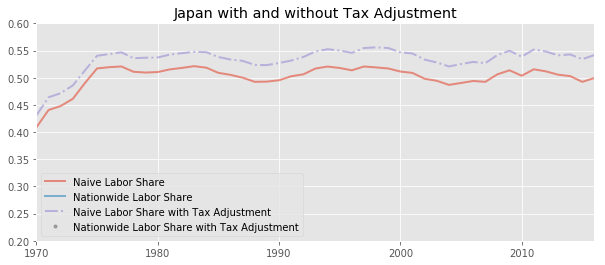

In [39]:
# use GDP but not sum-up, to avoid statistics discrepancy
LS_naive4 = CE4 / GDP2

# Nationwide Labor Share
theta4 = CE4 / (GDP2 - GOSGMI)
LS_national4 = ( CE4 + theta4*GOSGMI ) / GDP2

# Tax Adjustment:
tau00 = (TPI4)/GDP2

LS_naive5 = LS_naive4*(1/(1-tau00))
LS_national5 = LS_national4*(1/(1-tau00)) 

Year = np.linspace(1970,2016,num=47)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.2,0.6)
plt.xlim(1970,2016)
ax.plot(Year, LS_naive4, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_national4, linewidth=2, alpha=0.6, label='Nationwide Labor Share')
ax.plot(Year, LS_naive5, '-.', linewidth=2, alpha=0.6, label='Naive Labor Share with Tax Adjustment')
ax.plot(Year, LS_national5, '.', linewidth=2, alpha=0.6, label='Nationwide Labor Share with Tax Adjustment')
plt.title('Japan with and without Tax Adjustment')
ax.legend()
plt.show()

### Comments:

According to [The Labour Share in G20 Economies - OECD.org](https://www.oecd.org/g20/topics/employment-and-social-policy/The-Labour-Share-in-G20-Economies.pdf), Japanese Labor share is the lowest among G20 Economies, which corresponds to my gross results. There're two main reasons contributing to such low LS in Japan except Kaldor's stylized facts. 

Firstly, Return on Assets (ROA) is relatively higher in Japan. Besides, decrese mobility in the labor market is extremely significant in Japan than any other countries due to their culture. (i.e. People always find a company and work forever to show their loyalty). Hence labor had become a more difficult production factor to adjust.